## 1. 数据说明

+ 数据概览：10 个类别（书籍、平板、手机、水果、洗发水、热水器、蒙牛、衣服、计算机、酒店），共 6 万多条评论数据，正、负向评论各约 3 万条
+ 推荐实验：情感/观点/评论 倾向性分析
+ 数据来源：各电商平台，具体不详
+ 加工处理：将2份语料整合成1份语料、将原来零散的 excel, txt文档，整合成1个统一的csv文档、去重

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
file = './data/online_shopping_10_cats.csv'
data = pd.read_csv(file)
data = data.dropna(axis=0)
data.shape

(62773, 3)

### 1.1 数据概览

| 字段 | 说明 |
| ---- | ---- |
| cat | 类别 |
| label | 1 表示正向评论，0 表示负向评论 |
| review | 评论内容 |

In [3]:
pd.concat((data.head(5), data.tail(5)), axis=0)

,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
62769,酒店,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
62770,酒店,0,房间很小，整体设施老化，和四星的差距很大。毛巾太破旧了。早餐很简陋。房间隔音很差，隔两间房间...
62771,酒店,0,我感觉不行。。。性价比很差。不知道是银川都这样还是怎么的！
62772,酒店,0,房间时间长，进去有点异味！服务员是不是不够用啊！我在一楼找了半个小时以上才找到自己房间，想找...
62773,酒店,0,老人小孩一大家族聚会，选在吴宫泛太平洋，以为新加坡品牌一定很不错，没想到11点30分到前台，...


#### (1) 评论统计

In [4]:
print('样本总数: ', len(data))
print('正面评价: ', len(data[data.label==1]))
print('负面评价: ', len(data[data.label==0]))

样本总数:  62773
正面评价:  31727
负面评价:  31046


#### (2) 标签统计

In [5]:
cats = data['cat'].value_counts().index
display(cats)
data['cat'].value_counts()

Index(['水果', '平板', '酒店', '洗发水', '衣服', '计算机', '书籍', '手机', '蒙牛', '热水器'], dtype='object')

水果     10000
平板     10000
酒店     10000
洗发水    10000
衣服     10000
计算机     3992
书籍      3851
手机      2323
蒙牛      2033
热水器      574
Name: cat, dtype: int64

### 1.2 查看各类别语料的规模

In [6]:
for cat in cats:
    data_cat = data[data.cat==cat]
    print('{:<4}{} (总体)，{} (正例), {} (负例)'.format(cat, len(data_cat), len(data_cat[data_cat.label==1]), len(data_cat[data_cat.label==0])))

水果  10000 (总体)，5000 (正例), 5000 (负例)
平板  10000 (总体)，5000 (正例), 5000 (负例)
酒店  10000 (总体)，5000 (正例), 5000 (负例)
洗发水 10000 (总体)，5000 (正例), 5000 (负例)
衣服  10000 (总体)，5000 (正例), 5000 (负例)
计算机 3992 (总体)，1996 (正例), 1996 (负例)
书籍  3851 (总体)，2100 (正例), 1751 (负例)
手机  2323 (总体)，1165 (正例), 1158 (负例)
蒙牛  2033 (总体)，992 (正例), 1041 (负例)
热水器 574 (总体)，474 (正例), 100 (负例)


## 2. 数据预处理

接下来将对此次数据做以下几个处理：
+ 标签处理
+ 文本处理
+ 长度截断

### 2.1 标签转换

将文本标签转换为数值标签

In [7]:
cat_id_tuple = data['cat'].factorize()
data['cat_id'] = cat_id_tuple[0]
cat_to_id = {cat:i for i, cat in enumerate(cat_id_tuple[1])}
id_to_cat = {i:cat for i, cat in enumerate(cat_id_tuple[1])}
display(cat_to_id)
display(id_to_cat)

{'书籍': 0,
 '平板': 1,
 '手机': 2,
 '水果': 3,
 '洗发水': 4,
 '热水器': 5,
 '蒙牛': 6,
 '衣服': 7,
 '计算机': 8,
 '酒店': 9}

{0: '书籍',
 1: '平板',
 2: '手机',
 3: '水果',
 4: '洗发水',
 5: '热水器',
 6: '蒙牛',
 7: '衣服',
 8: '计算机',
 9: '酒店'}

In [8]:
data.sample(10)

,cat,label,review,cat_id
37306,蒙牛,1,蒙牛那个点滴的广告还不错,6
11072,平板,0,不用说，差评！充第二次电就充不满，充一天一夜了，不能支持国产,1
3183,书籍,0,垃圾书，典型的伪科学，幸好是帮人带的。,0
62264,酒店,0,这次住的是主楼豪华房，比东苑好些。但是一走进走廊就一股烟味，抽风系统好差，空气不好。床很不好...,9
44671,衣服,0,版型不错，穿起来蛮舒服，就是有一点让我很讨厌，后面缝牌子的线头扎的我又痒又痛，为什么不用别的...,7
34053,洗发水,0,京东的用户体验越来越差，每次快递都不送货上门，需要自己去取……再也不想用京东了,4
49441,计算机,1,白色钢琴漆面不错，电池使用时间满意，本子的重量合适，杜比的音响很好，键盘还算比较大。,8
10368,平板,0,为什么没有耳机.买的时间不是有耳机,1
59111,酒店,0,真不知道评价怎么那么好，订了一晚，肠子都悔青了，前台是一问三不知，房间小的出奇，内部饭店不好...,9
25531,水果,0,太小了！！绝对从不差评，这次要插评了！,3


### 2.2 文本处理

+ 定义函数*remove_punctuation*删除标点符号
+ 利用jieba对评论进行分词
+ 利用*stopwords.txt*对分词后的结果删除停用词

In [9]:
import re

# 将非中文、数字、字母的单词删除（用空字符替换）
def remove_punctuation(line):
    line = str(line)
    if line == '':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('', line)
    return line

data['clean_review'] = data['review'].apply(remove_punctuation)
data.sample(10)

,cat,label,review,cat_id,clean_review
11649,平板,0,只能这样给，我这才知道为什么这么多差评,1,只能这样给我这才知道为什么这么多差评
56576,酒店,1,"早餐不错,挺丰富的.还提供免费接机服务,性价比高,交通很方便!",9,早餐不错挺丰富的还提供免费接机服务性价比高交通很方便
28286,洗发水,1,为什么洗发露上面什么标识和字都没有。。。难道是亻叚的吗。,4,为什么洗发露上面什么标识和字都没有难道是亻叚的吗
30928,洗发水,1,价钱合适，用起来可以，量很足，可以用很久,4,价钱合适用起来可以量很足可以用很久
40414,衣服,1,宝贝质量很好，面料舒服，大小合适，很好看，物流也很给力，不错 ，五分好评。,7,宝贝质量很好面料舒服大小合适很好看物流也很给力不错五分好评
14711,手机,1,1：内外双彩屏，表现力很强；2：铃声质量很好，很有穿透力；3：支持MJPEG格式的录像，效果...,2,1内外双彩屏表现力很强2铃声质量很好很有穿透力3支持MJPEG格式的录像效果不错4使用动态内...
43708,衣服,1,裤子很好啊，穿起来很舒服，对比过好几家才买的！男朋友可喜欢了！物流也很快，还会再来的,7,裤子很好啊穿起来很舒服对比过好几家才买的男朋友可喜欢了物流也很快还会再来的
48971,计算机,1,双核，三星DDR3-1066，友达LED屏，独显，满意，到手是完美屏，不错。,8,双核三星DDR31066友达LED屏独显满意到手是完美屏不错
8837,平板,1,平板电脑质量非常好。一点也不卡速度非常快，,1,平板电脑质量非常好一点也不卡速度非常快
30586,洗发水,1,东西不错，还是一样的好，第二次购买了,4,东西不错还是一样的好第二次购买了


In [10]:
#coding:utf-8　

def stop(file):
    stopwords = [line.strip() for line in open(file, 'r', encoding='utf-8').readlines()]
    return stopwords

stopwords = stop('./data/cn_stopwords.txt')
stopwords[:20]

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一']

In [11]:
import jieba as jb

data['cut_review'] = data['clean_review'].apply(lambda line: " ".join([w for w in jb.lcut(line) if w not in stopwords]))
data.sample(10)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cuda\AppData\Local\Temp\jieba.cache
Loading model cost 0.515 seconds.
Prefix dict has been built successfully.


,cat,label,review,cat_id,clean_review,cut_review
27889,洗发水,1,不知道好不好，还没喝。。。。。。。。。。。,4,不知道好不好还没喝,知道 好不好 没 喝
12286,平板,0,很不满意的一次购物…虽然东西还是可以的…但是十六号的订单…二十六号才收到…,1,很不满意的一次购物虽然东西还是可以的但是十六号的订单二十六号才收到,满意 一次 购物 东西 十六号 订单 二十六 号 收到
14468,手机,1,操作比较直观，手写识别率比国外品牌好，音质不错,2,操作比较直观手写识别率比国外品牌好音质不错,操作 比较 直观 手写 识别率 国外品牌 音质 不错
30119,洗发水,1,宝贝收到了 还有很多赠品 真的感觉太超值了 上午定的货 下午就到了 京东物流就是快 感谢京东...,4,宝贝收到了还有很多赠品真的感觉太超值了上午定的货下午就到了京东物流就是快感谢京东感谢物流小哥,宝贝 收到 很多 赠品 真的 感觉 太 超值 上午 定 货 下午 京东 物流 快 感谢 京东...
38592,蒙牛,0,太太太恶心了。。蒙牛，去死！,6,太太太恶心了蒙牛去死,太太 太 恶心 蒙牛 死
44526,衣服,0,态度啥都很好，可惜就是掉色严重，扫条码也扫不出来，也不知道到底是不是真的？,7,态度啥都很好可惜就是掉色严重扫条码也扫不出来也不知道到底是不是真的,态度 可惜 掉色 严重 扫 条码 扫 知道 到底 是不是 真的
38360,蒙牛,0,huab 换马甲就不认识你了。听见蒙牛就想吐,6,huab换马甲就不认识你了听见蒙牛就想吐,huab 换马甲 认识 听见 蒙牛 想 吐
48052,衣服,0,裤腿太粗，裆太低踢不起来腿,7,裤腿太粗裆太低踢不起来腿,裤腿 太粗 裆 太 低 踢 起来 腿
3889,平板,1,以后若出现不可接受的大问题 会补评，毕竟安卓平板比不了苹果平板，个人不怎么喜欢苹果封闭性，大...,1,以后若出现不可接受的大问题会补评毕竟安卓平板比不了苹果平板个人不怎么喜欢苹果封闭性大家仁者见...,以后 出现 不可 接受 问题 会 补评 毕竟 安卓 平板 不了 苹果 平板 个人 不怎么 喜...
62735,酒店,0,除了价格实惠、地理位置还可以，其他没啥！吹风机没有，还要100押金才行！楼上也不知道哪里漏水...,9,除了价格实惠地理位置还可以其他没啥吹风机没有还要100押金才行楼上也不知道哪里漏水水声一晚上...,价格 实惠 地理位置 没 吹风机 没有 100 押金 才行 楼上 知道 漏水 水声 晚上 前...


## 3. LSTM建模

接下来进行LSTM建模，主要包括以下步骤
+ 评论文本截断
+ 模型搭建
+ 模型训练与评估

### 3.1 文本截断

设置评论最大长度、词典大小、词向量维度

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
max_len = 100
max_word_num = 50000
embed_dim = 250

In [14]:
tokenizer = Tokenizer(num_words=max_word_num)
tokenizer.fit_on_texts(data['cut_review'].values)

In [15]:
x = tokenizer.texts_to_sequences(data['cut_review'].values)
x = pad_sequences(x, maxlen=max_len, padding='pre', truncating='post')

y = pd.get_dummies(data['cat_id'].values)

In [16]:
print(x.shape)
print(y.shape)

(62773, 100)
(62773, 10)


In [17]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1)
print(x_train.shape, y_train.shape)

(56495, 100) (56495, 10)


### 3.2 模型构建

In [18]:
from tensorflow.keras.layers import LSTM, SpatialDropout1D, Dense, Embedding, InputLayer
from tensorflow.keras import Sequential

import tensorflow as tf
tf.test.is_built_with_gpu_support()

True

In [19]:
model = Sequential([
#     InputLayer(input_length=x.shape[1]),
    Embedding(input_dim=max_word_num, output_dim=embed_dim, input_length=x.shape[1]),
    SpatialDropout1D(0.2),
    LSTM(units=100, dropout=0.2, recurrent_dropout=0.2),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 250)          12500000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 250)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               140400    
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
Total params: 12,641,410
Trainable params: 12,641,410
Non-trainable params: 0
_________________________________________________________________


In [20]:
from time import time

epochs = 8
batch_size = 64
t0 = time()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print('Processing time: ', time()-t0)

Epoch 1/8
707/707 [==============================] - 294s 415ms/step - loss: 0.6830 - acc: 0.7722 - val_loss: 0.3934 - val_acc: 0.8637
Epoch 2/8
707/707 [==============================] - 296s 419ms/step - loss: 0.3153 - acc: 0.8933 - val_loss: 0.3313 - val_acc: 0.8857
Epoch 3/8
707/707 [==============================] - 293s 414ms/step - loss: 0.2585 - acc: 0.9129 - val_loss: 0.3154 - val_acc: 0.8918
Epoch 4/8
707/707 [==============================] - 296s 418ms/step - loss: 0.2287 - acc: 0.9226 - val_loss: 0.3206 - val_acc: 0.8915
Epoch 5/8
707/707 [==============================] - 294s 416ms/step - loss: 0.2048 - acc: 0.9308 - val_loss: 0.3091 - val_acc: 0.8987
Epoch 6/8
707/707 [==============================] - 294s 416ms/step - loss: 0.1877 - acc: 0.9366 - val_loss: 0.3078 - val_acc: 0.8970
Epoch 7/8
707/707 [==============================] - 292s 413ms/step - loss: 0.1731 - acc: 0.9407 - val_loss: 0.3200 - val_acc: 0.8960
Epoch 8/8
707/707 [==============================] - 29

In [21]:
model.save('./models/lstm_shopping.h5')

In [22]:
def plot_acc(history):
    train_acc = history['acc']
    dev_acc = history['val_acc']
    train_loss = history['loss']
    dev_loss = history['val_loss']
    x = range(len(train_acc))
    plt.figure(figsize=(10,6))
    plt.plot(x, train_acc, 'b', label='Train Accuracy')
    plt.plot(x, dev_acc, 'r', label='Valid Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

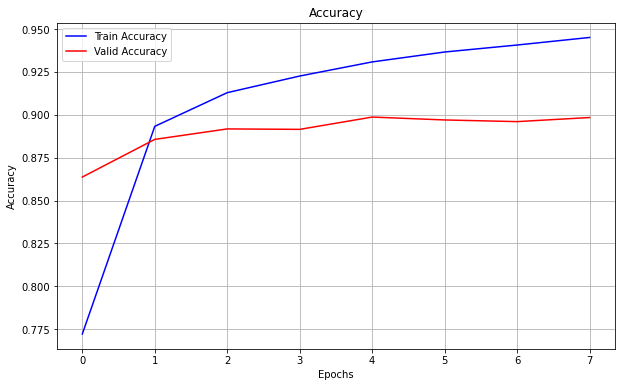

In [23]:
plot_acc(history.history)